In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [ ]:
import cv2
print("OpenCV Version:", cv2.__version__)

OpenCV Version: 4.11.0


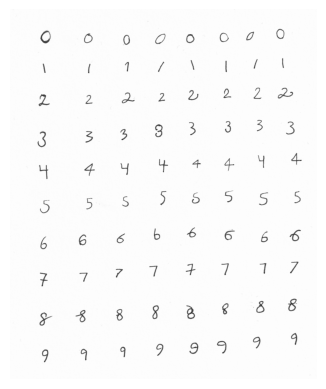

In [14]:
image = cv2.imread(r"C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\Digits_test_MHN.jpg", cv2.IMREAD_GRAYSCALE)

# Convert grayscale to RGB (although grayscale has no color channels)
img_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  

# Display the image
plt.imshow(img_rgb, cmap="gray")  # Use 'gray' to display grayscale images correctly
plt.axis("off")  # Hide axis
plt.show()

In [15]:
# Define folder path
digit_images = r"C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\digit_images"

# Create folder if it doesn't exist
os.makedirs(digit_images, exist_ok=True)

print(f"Folder created (or already exists): {digit_images}")

Folder created (or already exists): C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\digit_images


In [55]:
import cv2
import numpy as np
import os

# Set paths
image_path = r"C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\Digits_test_MHN.jpg"
digit_images = r"C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\digit_images"
os.makedirs(digit_images, exist_ok=True)

# Load image and preprocess
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours (digits)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by bounding box (top-to-bottom, left-to-right)
bounding_boxes = [cv2.boundingRect(c) for c in contours]
contours, bounding_boxes = zip(*sorted(zip(contours, bounding_boxes), key=lambda b: (b[1][1] // 40, b[1][0])))

# Define digit labels manually
actual_digits = [digit for digit in range(10) for _ in range(8)]

# Filtering parameters (relaxed)
MIN_AREA, MAX_AREA = 100, 25000
PADDING = 5

valid_digit_count = 0

# Process and save each contour with safeguard
for i, (cnt, (x, y, w, h)) in enumerate(zip(contours, bounding_boxes)):
    area = w * h

    if area < MIN_AREA or area > MAX_AREA:
        continue

    # Check to avoid index error
    if valid_digit_count >= len(actual_digits):
        print("⚠️ Reached maximum digit count. Stopping.")
        break

    # Apply padding
    x, y = max(0, x - PADDING), max(0, y - PADDING)
    w, h = min(binary.shape[1] - x, w + 2 * PADDING), min(binary.shape[0] - y, h + 2 * PADDING)

    digit = binary[y:y+h, x:x+w]
    digit_resized = cv2.resize(digit, (28, 28))

    actual_digit = actual_digits[valid_digit_count]
    filename = f"{actual_digit}_{valid_digit_count}.png"
    cv2.imwrite(os.path.join(digit_images, filename), digit_resized)

    valid_digit_count += 1

print(f"✅ {valid_digit_count} valid digits saved in {digit_images}")


⚠️ Reached maximum digit count. Stopping.
✅ 80 valid digits saved in C:\Users\marya\Desktop\Machine Learning\Kunskapskontroll_2\Kunskapskontroll 2\digit_images
